In [ ]:
#Install modules
!pip install pandas
!pip install matplotlib
!pip install wordcloud
!pip install jieba 
!pip install scipy
!pip install -U seaborn

In [ ]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from PIL import Image
import wordcloud
import numpy as np

path = '/Library/Fonts/SimHei.ttf'
prop = mpl.font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()

In [4]:
# Read specific column of a dataset
import csv
text_for_wordcloud=[]     #an empty list to store the second column
with open('米兔运动.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        text_for_wordcloud.append(row[2])
text_for_wordcloud = "".join(text_for_wordcloud[1:])    #exclude the title for this column and combine elements

#Remove all punctuations
import re
punctuation='[\s+\.\!\/_,$%^*(+\"\')]+|[+——()?:【】“”‘’！，。？、~@#￥%……&*（）《》·：；『』]+'
text_for_wordcloud = re.sub(punctuation,' ',text_for_wordcloud).replace(" ","")
text_for_wordcloud

#Segment the whole text into words via jieba
import jieba
segment_text_for_wordcloud = list(jieba.cut(text_for_wordcloud,cut_all = False))

#Handle the stop words
#Source of the stop words list: https://blog.csdn.net/duck_genuine/article/details/5831499
#I also added some stop words according to the content of the text
stop_words = ["因为","不是","把","为","可以","什么","而","但是","就是","还是","但","又","觉得","这个","多","更","中","与","全文","对","让","他","还","的","了", "在", "是", "我", "有", "和", "就", "不", "人", "都", "一", "一个", "上", "也", "很", "到", "说", "要", "去", "你", "会", "着", "没有", "看", "好", "自己", "这" ]
def remove_stop_words(segment_text_for_wordcloud, stop_words):
    words_list = []
    for w in segment_text_for_wordcloud:
        if w not in stop_words:
            words_list.append(w)
    return words_list

processed_word_list = remove_stop_words(segment_text_for_wordcloud, stop_words)

#Rank the keywords from higher frequency to lower frequency
import os
import pandas as pd
word_count = pd.Series(processed_word_list).value_counts().sort_values(ascending=False)[0:15]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/72/vj3ydnb508sbtqchqbns22qw0000gn/T/jieba.cache
Loading model cost 1.297 seconds.
Prefix dict has been built succesfully.


In [5]:
word_count

兔      470
运动     439
米      426
被      186
女性     125
我们      83
她       80
性侵      76
性骚扰     69
事件      60
中国      55
现在      52
指控      51
美国      51
受害者     45
dtype: int64

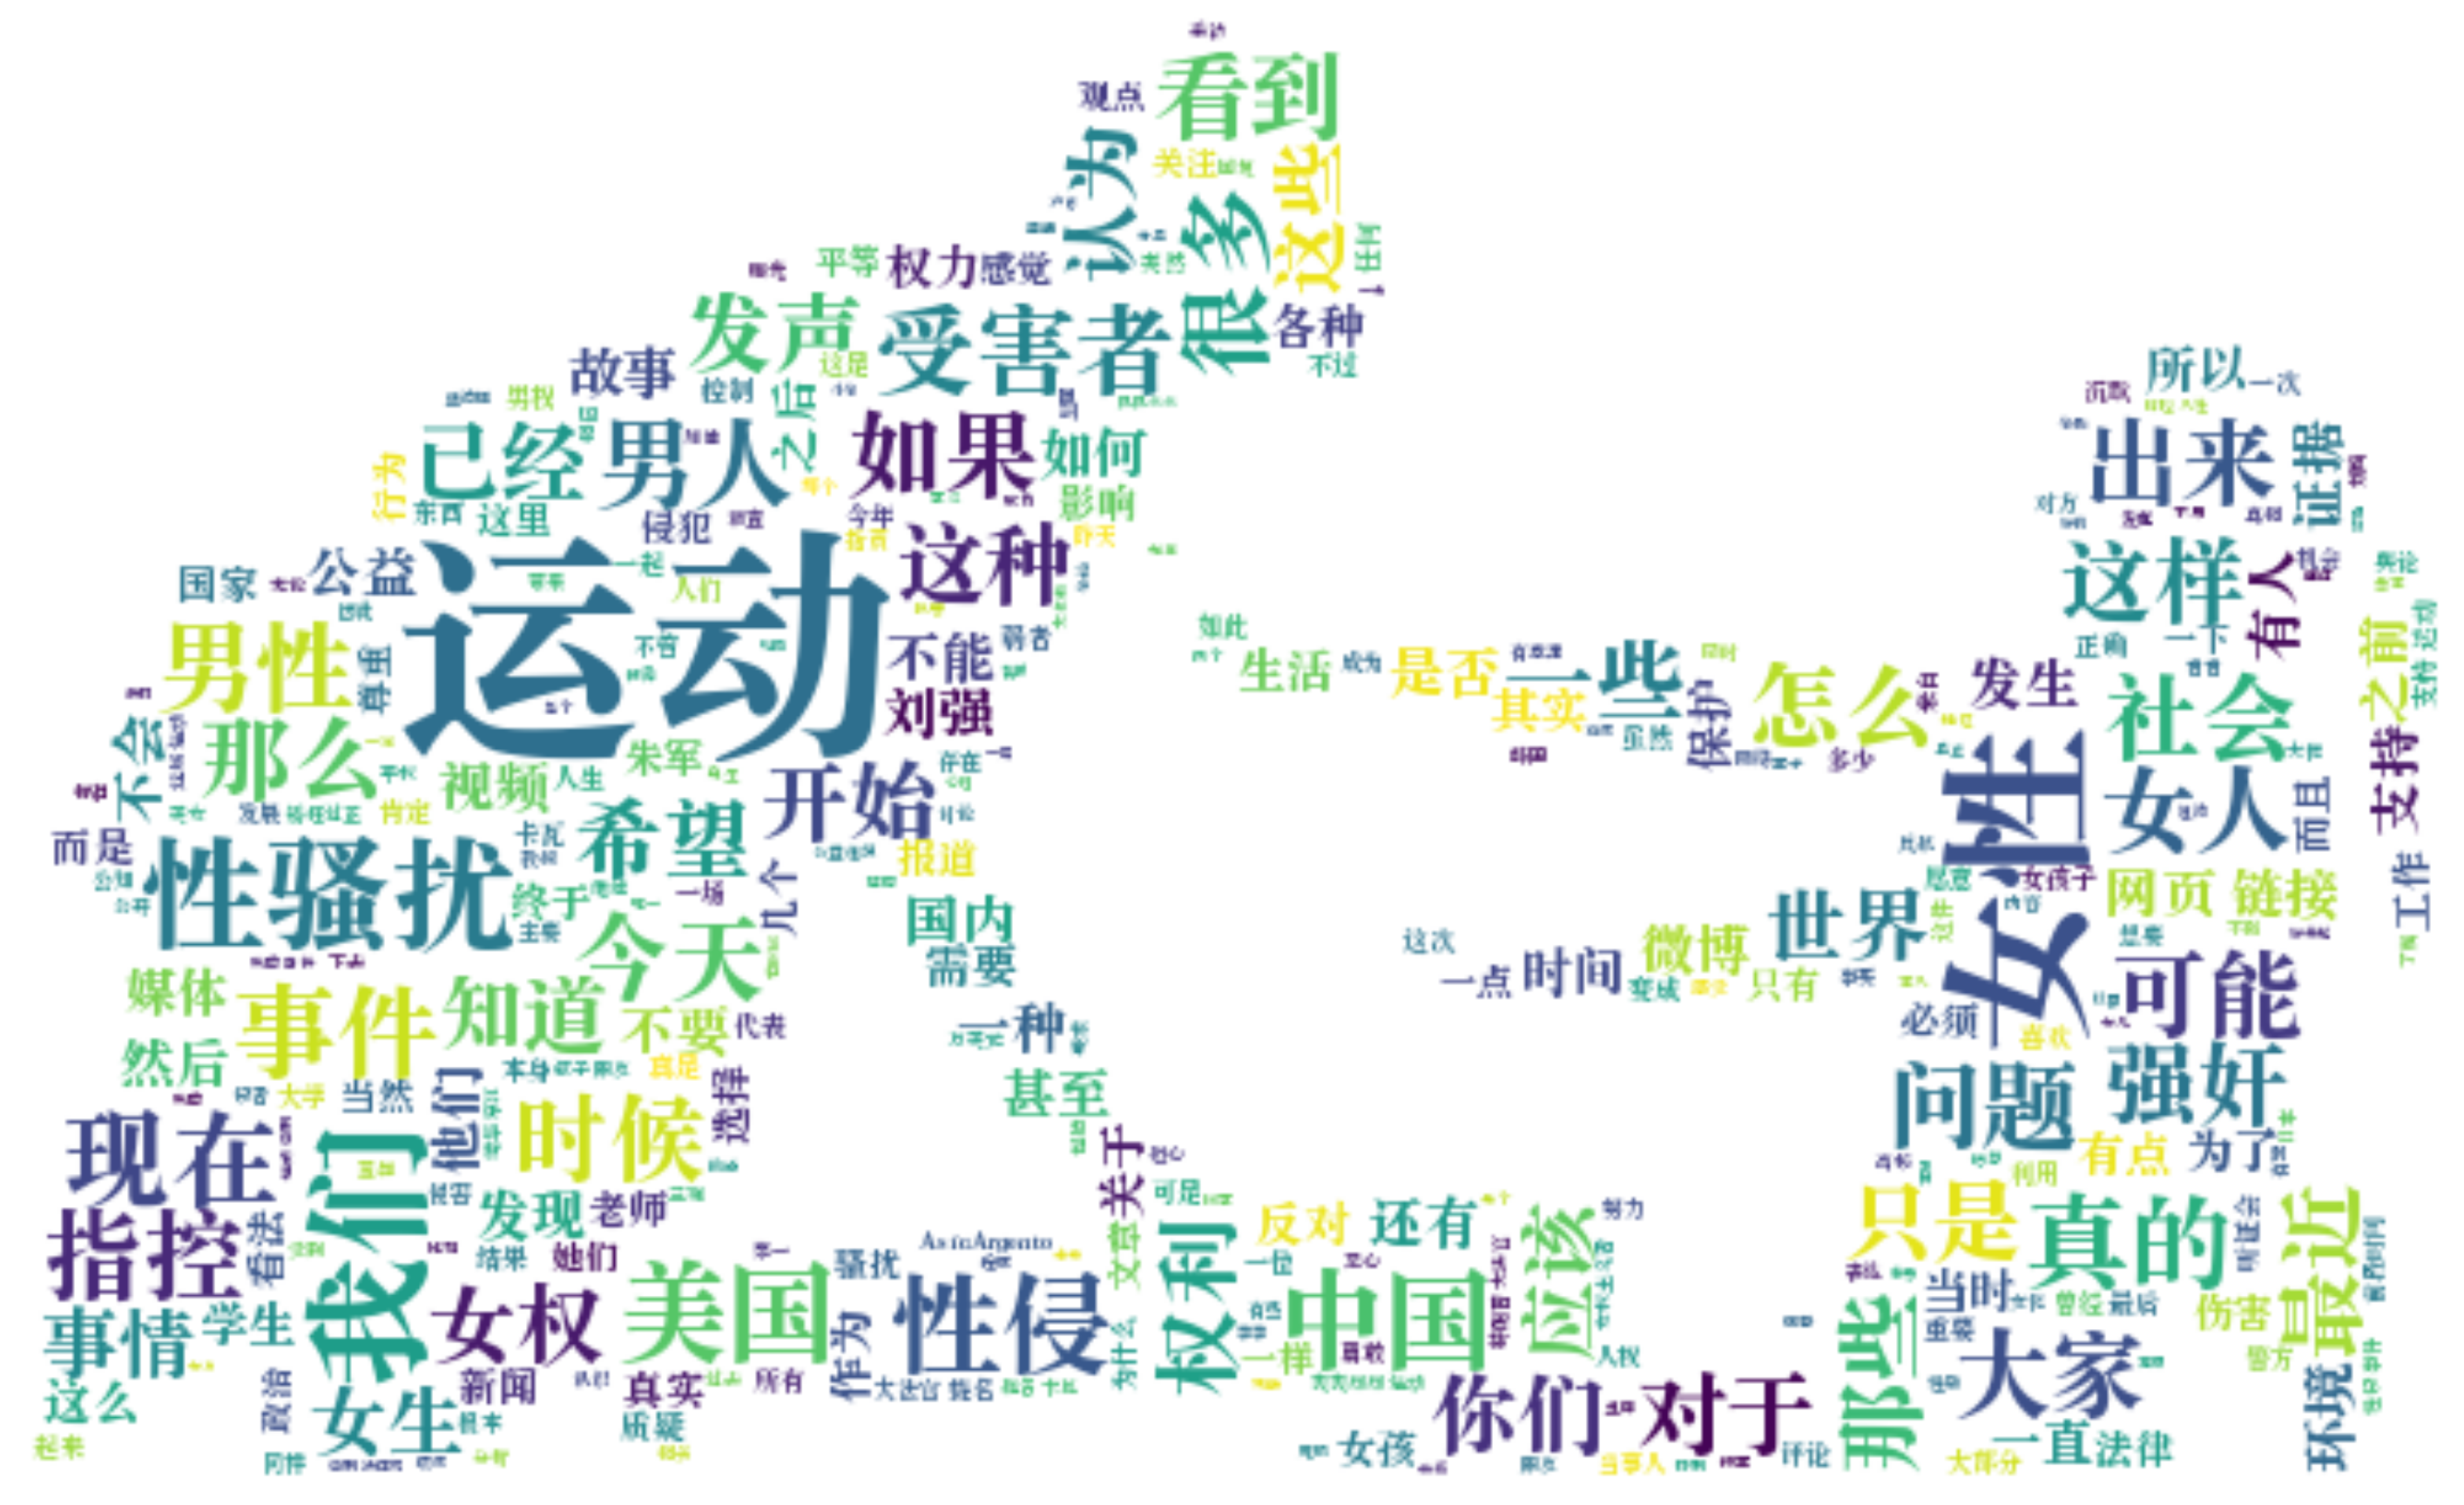

In [6]:
#Generate the wordcloud
mask = np.array(Image.open('mask.jpg'))

wc = wordcloud.WordCloud(background_color="white", max_words=2000, font_path='/Library/Fonts/Songti.ttc', mask=mask)
wc.generate_from_text(' '.join(processed_word_list)) 
plt.figure(figsize=(50, 50))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# 1. What are discussed more frequently when people mention "米兔运动" on Weibo？ 

As the wordcloud above shows, people discuss more about "女性""我们""性侵""性骚扰""事件""中国""现在""指控""美国""受害者" when mentioning "米兔运动".

In [7]:
from pandas import DataFrame
import pandas as pd
df = pd.read_csv('米兔运动.csv')

# In order to accurately identify the KOL, I manually excluded some popular spread but unrelated posts on "米兔运动".
df = df.drop(418)
df = df.drop(415)
df = df.drop(416)
df = df.drop(412)
df
df['KOL']= df['Repost']+df['Comment']+df['Like']

In [8]:
# In order to accurately identify the KOL, manually exclude unrelated posts on "米兔运动".
df['KOL'].describe()
df = df.sort_values(['KOL'], ascending = [False])
kol = df[:15]
kol

,Name,Time,Content,Repost,Comment,Like,KOL
420,清狂_爬墙且佛,2016-06-22,建议去@清华常江 微博看看#米兔运动# 的案例，学会保护自己，特别是还在校未工作的孩子。尽量...,742,398,5159,6299
0,清华常江,11-02,感谢我的老师（同时也是我的同事）金兼斌教授对我做的专访——《米兔运动、介入式文化研究与知识分...,795,79,690,1564
217,ItsssLily,08-20,在米兔运动开启之前，我一直觉得游刃有余地行走在男性中是一种成熟女性的生存技能。米兔运动真的有...,894,248,216,1358
194,LRTTPSLAYAL,08-20,这个世界真的很有意思。有些人一会儿高举旗帜呐喊“这个世界对女孩子不友好不公平！我们要支持米兔...,894,248,216,1358
105,布拉佛斯搬砖工,09-15,有句港句，米兔时间长了一定会被用作政治攻击手段，这不是米兔本身的问题，任何运动都会被政客利用...,601,72,334,1007
401,爱吃山竹2011,2016-10-12,米兔运动涉及到公知圈，对政府而言是一个机会，政府会用各种手段保护这些公知，交换条件是从此摇尾...,167,16,651,834
397,举村杨,2017-06-22,“米兔”和“种花家的兔子”没有区别，都是兔（土），只不过前者是米国兔子而已。只有蒋方舟对章文...,263,242,102,607
370,Sukimiko,2017-06-22,很多极端女权主义者在疯狂的为米兔站台，但是就在米兔的发源地——美国——这个运动给美国人民的什...,263,242,102,607
419,乌啦呸,2016-06-23,1. 武汉生物偶发性不合格。\n 2. 全力督促长春长生检查。\n 3. 因法规规定不能继续...,14,12,501,527
281,彤仔儿ii,08-05,我也是运动（米兔运动）在美国继续蔓延：18个月的调查之后，宾夕法尼亚最高法院信息公开披露，过...,75,150,271,496


Text(0.5,1,'Top 15 KOL for "米兔运动" on Weibo')

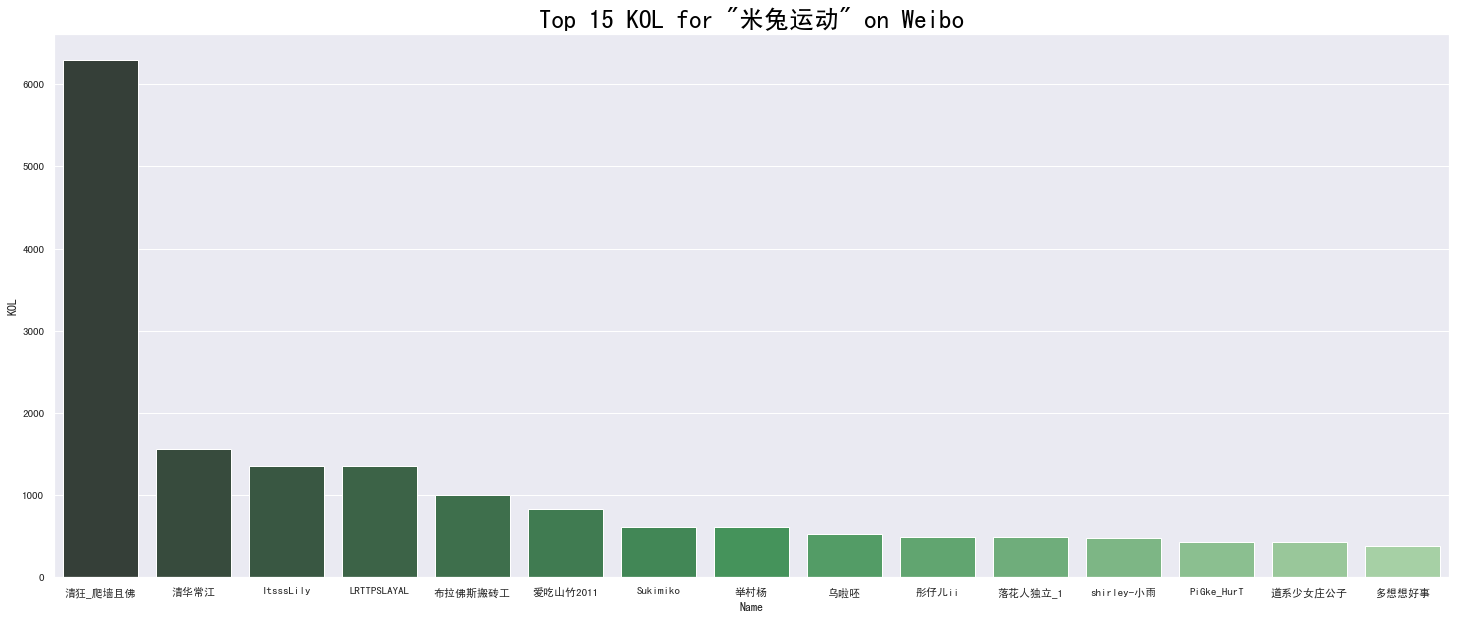

In [9]:
import matplotlib.pyplot as plt2
import seaborn as sns
sns.set(font='Simhei', rc={'figure.figsize':(25,10)}) 
pd_df = kol.groupby(['Name'])['KOL'].mean().reset_index().sort_values("KOL",ascending=False) #this is to solve the output chart is not sorted by likes.
ax = sns.barplot(x='Name', y='KOL',data=pd_df,palette=("Greens_d")) #palette is like the color combination style
plt.title('Top 15 KOL for "米兔运动" on Weibo', color='black', fontsize=25, weight='bold')

# 2. Who are the key opinion leaders in the discussion of "米兔运动" on Weibo？ 

According to a simple algorithm to identify KOL (count the total amounts of likes, comments and reposts for their posts), we can identify the top 15 KOL in the in the discussion of "米兔运动" on Weibo. Surprisingly, the first KOL is not a celebrity or an intellectual with lots of followers, she just acted as a "broker" to recommand @清华长江 who is the second one of the KOLs we find.

In [ ]:
df = pd.read_csv('米兔运动.csv')
df['KOL']= df['Repost']+df['Comment']+df['Like']
dt = df.sort_index(axis=0, ascending=False)
dt

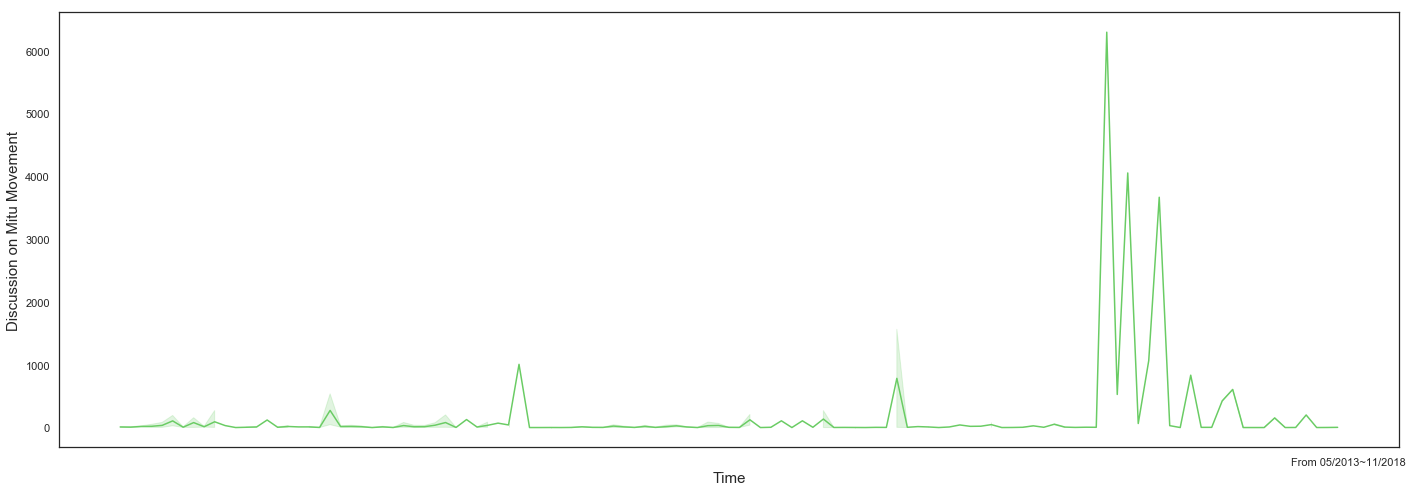

In [134]:
dt

fig = plt.figure(figsize=(24,8))
ax = sns.lineplot(x="Time", y="KOL",data=dt, color="g")
ax.set_xlabel('Time',fontsize = 15)                                                                   
ax.set_ylabel('Discussion on Mitu Movement', fontsize = 15) 
ax.set_xticks(["From 05/2013~11/2018"])

# 3. How does discussion on "米兔运动" vary over time on Weibo？

Because the sequence of data I crawled from Weibo is based on the time series from the time point obtaining data to before, we can get a basic sketch on the how the discussion on "米兔运动" vary from 05/2013 to 11/2018. The discussion about 米兔运动 is more heated in recent year due to the #MeToo movement on a global level.